# Pymaceuticals Inc.
---

### Analysis

-in this study, a total of 248 mice were observed over a maximum of 45 days to see the effects of certain cancer treatments on the size of tumors.

Through this study, it has been gathered that the mice treated with Capomulin and Ramicane had the most observed timepoints with 230 and 228 respetively. Thus, insights the conclusion that these two treatments had the most effects on longevity of survival.

The mice population in regards to gender showed a balanced distribution amongst male and females as there were 125 males and 124 females observed in this study, displaying an almost 50/50 ratio.

in image Dist_TumorVol: Four treatments, Capomulin, Ramicane, Infubinol, and Ceftamin, were selected for further study in their distribution of tumor volume at the final timepoint observed. In the image, it is shown that, at the final timepoint of observation for the mice observed in each treatment, mice treated with Capomulin and RAmicane was observed to have significantly smaller tumor volume sizes than mice treated with Infubinol and Ceftamin. Mouse c326 treated with Infubinol was found to be the only outlier.

in image Mouse_L509, displays a linegraph of the progression of mouse l509's treatment over the full obersvation period (45 days). in this image, we can see how the treatment Capomulin had decreased the size of the tumor over time.

in image Correlation_mouseVsweight, it displays the correlation bewteen the mouse weight and the volume of the tumor for the mice treated with Capomulin. It shows that the higher the weight of the mouse, the larger the tumor they would present. 

the overall performance the of the treatment, Capomulin, was satisfactory.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(mouse_metadata,study_results,
                                    how='outer',on='Mouse ID')

study_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = len(study_df["Mouse ID"].unique())
print(f"Number of Mice in Experiment: {mice_count} ")

Number of Mice in Experiment: 249 


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# set index to mouse ID
dup_mouseID =study_df.loc[study_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"Duplicated Mouse in study: {dup_mouseID}")

Duplicated Mouse in study: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseID_df = study_df.loc[study_df["Mouse ID"] == 'g989', :]
dup_mouseID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mousedata_df = study_df[study_df["Mouse ID"].isin(dup_mouseID) == False]
cleaned_mousedata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mousedata_df["Mouse ID"].unique())
print(f"Number of mice in clean data: {cleaned_mouse_count}")

Number of mice in clean data: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_mousedata_df["Tumor Volume (mm3)"].groupby(cleaned_mousedata_df["Drug Regimen"]).mean()
median = cleaned_mousedata_df["Tumor Volume (mm3)"].groupby(cleaned_mousedata_df["Drug Regimen"]).median()
variance = cleaned_mousedata_df["Tumor Volume (mm3)"].groupby(cleaned_mousedata_df["Drug Regimen"]).var()
stanDev = cleaned_mousedata_df["Tumor Volume (mm3)"].groupby(cleaned_mousedata_df["Drug Regimen"]).std()
sem =cleaned_mousedata_df["Tumor Volume (mm3)"].groupby(cleaned_mousedata_df["Drug Regimen"]).sem()

summary = {"Mean Tumor Volume": mean,
           "Median Tumor Volume": median,
           "Tumor Volume Variance": variance,
           "Tumor Volume Std. Dev.": stanDev,
           "Tumor Volume Std. Err.": sem
           }

summaryStats = pd.DataFrame(summary)
summaryStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = cleaned_mousedata_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std','sem'])
agg_stats 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Number of Observed Mice Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

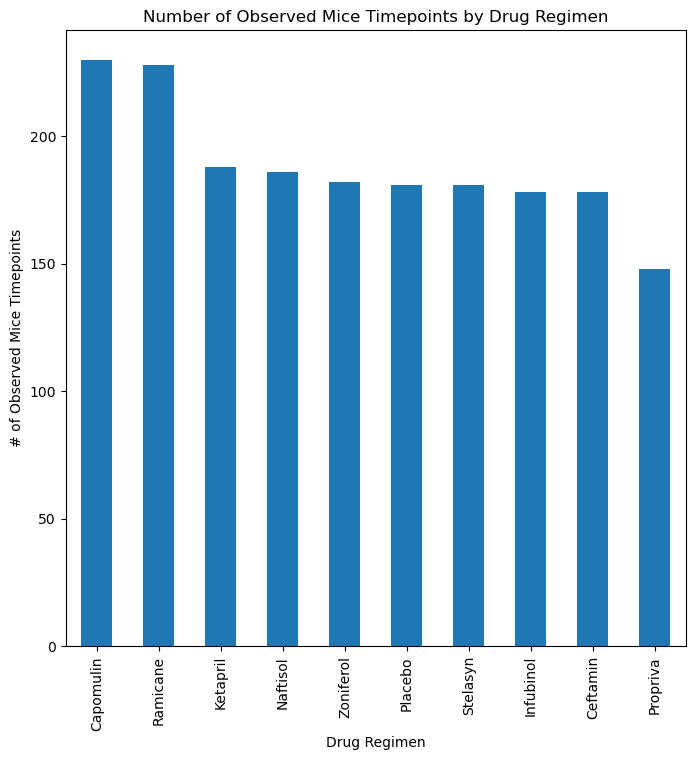

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MiceDrugCount = cleaned_mousedata_df["Drug Regimen"].value_counts()

pandas_Bar = MiceDrugCount.plot(kind='bar',xlabel="Drug Regimen",ylabel="# of Observed Mice Timepoints",title="Number of Observed Mice Timepoints by Drug Regimen",figsize=(8,8) )

pandas_Bar


In [10]:
MiceDrugCount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

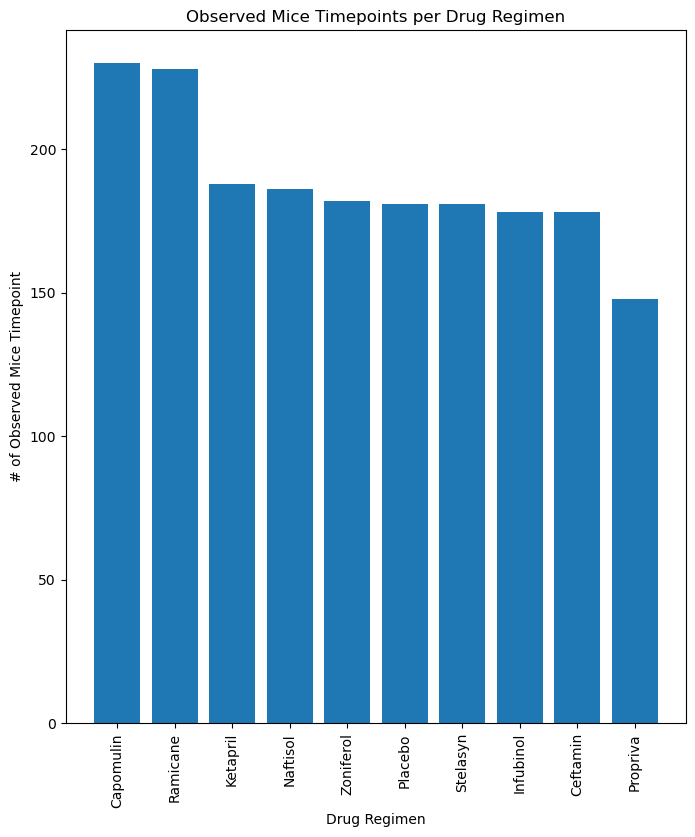

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(8,9))
plt.bar(MiceDrugCount.index,MiceDrugCount.values)
plt.title("Observed Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoint")
plt.xticks(rotation='vertical')


plt.tight_layout
plt.show()

<Axes: title={'center': 'Male vs. Female Mouse Population'}, ylabel='Sex'>

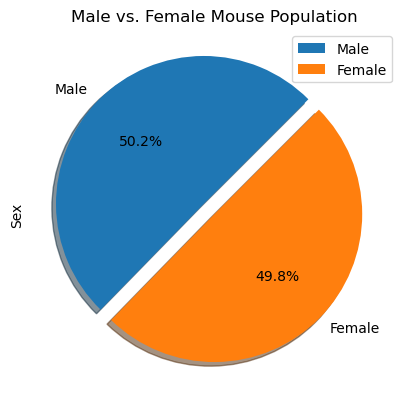

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# can't figure out how to remove duplicate names from MouseID in cleaned data, will be using info from mouse_metadata isntead
copy_MouseCSV = mouse_metadata.copy()

# Find if the duplicate is in this file
# dup_mouse =copy_MouseCSV.loc[mousecapomulin_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
# print(f"Duplicated Mouse in study: {dup_mouse}")
# # above confirmed ther is no duplicates

# Find total of males vs females from file
gender_counts = copy_MouseCSV["Sex"].value_counts()
gender_counts
# male: 125, female: 124

pandas_Pie = gender_counts.plot(kind='pie',autopct="%1.1f%%",
                                startangle=45,explode=(0.1,0),
                                shadow=True,legend='upper right',
                                title="Male vs. Female Mouse Population"
                                )
pandas_Pie

In [13]:
gender_counts

Male      125
Female    124
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x271bd5fc910>,
 [Text(-0.853864059107792, 0.8431584480772077, ''),
  Text(0.7827087208488092, -0.7728952440707738, '')],
 [Text(-0.4980873678128786, 0.49184242804503786, '50.2%'),
  Text(0.42693202955389586, -0.4215792240386039, '49.8%')])

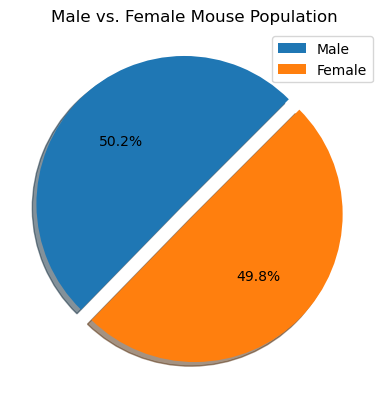

<Figure size 500x500 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = plt.pie(gender_counts,autopct="%1.1f%%",
                    startangle=45,explode=(0.1,0),
                    shadow=True                                
                    )

plt.title("Male vs. Female Mouse Population")
plt.legend(gender_counts.index)
plt.figure(figsize=(5,5))
pyplot_pie

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_Time = cleaned_mousedata_df.groupby(["Mouse ID"])["Timepoint"].max()
max_Time

max_time_df = pd.DataFrame(max_Time)
max_time_df
#  # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = max_time_df.merge(cleaned_mousedata_df, how="inner",on=["Mouse ID","Timepoint"])
merged
# cleaned_mousedata_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
fourRegimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
RegimenList = []


for drug in fourRegimen:
    capmouse = merged.loc[merged["Drug Regimen"] == drug,"Tumor Volume (mm3)"]

    RegimenList.append(capmouse)

    quartiles = capmouse.quantile([0.25,0.5,0.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles [0.75]
    iqr = upperq-lowerq 

    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    outliers = capmouse.loc[(capmouse < lowerbound) | (capmouse > upperbound)]
    print(f" For {drug}, the outliers are: {outliers}")

# # IQR = q3-q1

#     # Locate the rows which contain mice on each drug and get the tumor volumes

    
#     # add subset 

    
#     # Determine outliers using upper and lower bounds

outMouse = merged.iloc[31,0]
print(f"-----------------------------------")
print(f"The mouse that is an outlier is {outMouse}")

 For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------
The mouse that is an outlier is c326


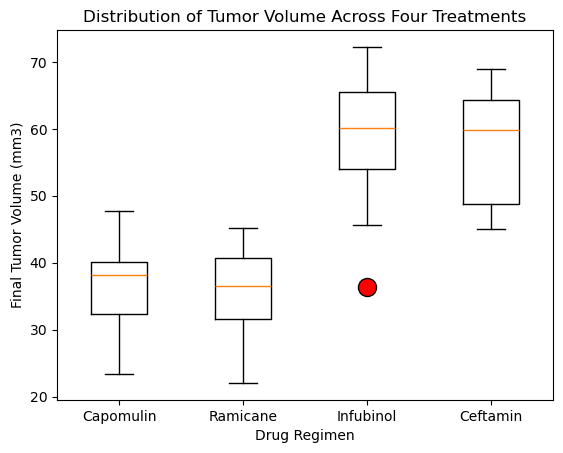

<Figure size 640x480 with 0 Axes>

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Volume Across Four Treatments")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(RegimenList,labels=fourRegimen,flierprops={'markerfacecolor':'red','markersize':13})
plt.show()
plt.savefig("images/Dist_TumorVol.png")

## Line and Scatter Plots

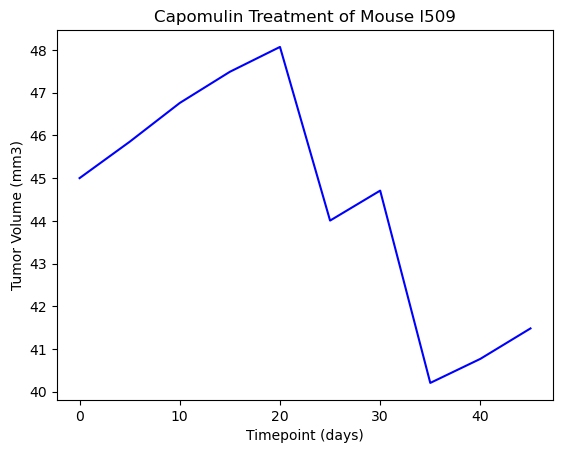

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (using mouse L509)
capMouse = cleaned_mousedata_df.loc[cleaned_mousedata_df["Mouse ID"] == "l509",:]
capMouse # checked to see all data is present for mouse L509

capLine = plt.plot(capMouse["Timepoint"],capMouse["Tumor Volume (mm3)"], color="blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
capLine

plt.savefig("images/Mouse_L509.png")

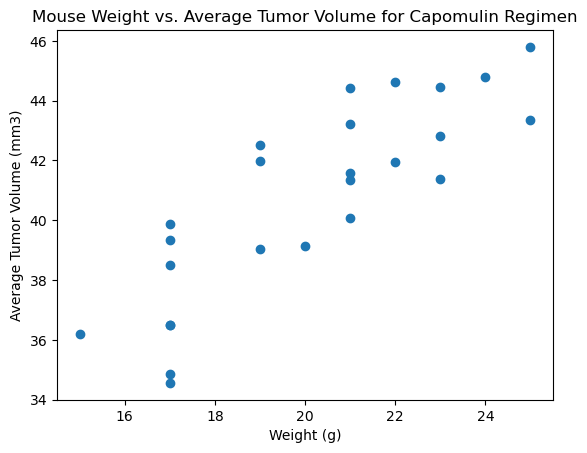

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mousedata_df.loc[cleaned_mousedata_df["Drug Regimen"] == "Capomulin"]

#--- calculate average weight for capomulin
avg_cap = capomulin_data.groupby(["Mouse ID"]).mean()
avg_cap # check the values are there

xvals = avg_cap.iloc[:,1]
yvals = avg_cap.iloc[:,3]

plt.scatter(xvals,yvals)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.savefig("images/Weight vs Volume.png")

## Correlation and Regression

 The correlation between mouse weight and the everage tumor volume is 0.84


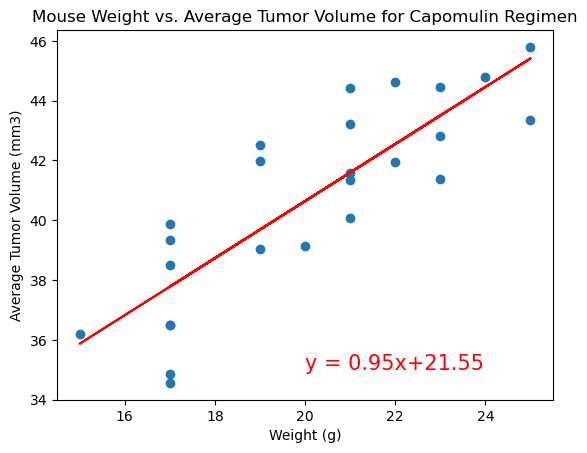

<Figure size 640x480 with 0 Axes>

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

plt.scatter(xvals,yvals)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvals, yvals)
regress_vals = xvals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.plot(xvals,regress_vals, "r-")
plt.annotate(line_eq, (20,35), fontsize=15, color="red")
print(f" The correlation between mouse weight and the everage tumor volume is {round(rvalue,2)}")
plt.show()

plt.savefig("images/Correlation_mouseVsweight.png")
